In [1]:
import sys
sys.path.append('/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/codes/')
from module.backtesting import *
from numpy import linalg as LA
import pandas as pd

# Norm compairson between TBN and correlation matrix

In [2]:
backtest_agent = vectorized_backtesting()
tbn_total = backtest_agent.tbn_combined
correlation_matrix_total = backtest_agent.correlation_aggregate

In [3]:
def get_norm_time_series(start_year = 1996, end_year = 2017):
    '''
    Compute matrix norm for TBN and sample correlation matrix in a time period.
    Returns:
        df_total: pd.DataFrame
                A (N x 6) dataframe of matrix norm in N year sample. 
                It consists of 3 level norm for both TBN and correlation.
    '''
    year_range = range(start_year, end_year + 1)

    norm_dict = {1: 1, 2: 2, 'inf': np.inf}
    norm_list = norm_dict.values()

    norm_name_list_tbn = ['TBN 1-norm', 'TBN 2-norm', 'TBN inf-norm']
    norm_name_list_correlation = ['Correlation 1-norm', 'Correlation 2-norm', 'Correlation inf-norm']

    norm_time_series_tbn = [[LA.norm(tbn_total.loc[year], norm) for year in year_range] for norm in norm_list]
    norm_time_series_correlation = [[LA.norm(correlation_matrix_total.loc[year], norm) for year in year_range] for norm in norm_list]

    df_tbn = pd.DataFrame(norm_time_series_tbn, columns=year_range, index=norm_name_list_tbn)
    df_correlation = pd.DataFrame(norm_time_series_correlation, columns=year_range, index=norm_name_list_correlation)
    df_total = pd.concat([df_tbn, df_correlation]).T

    return df_total

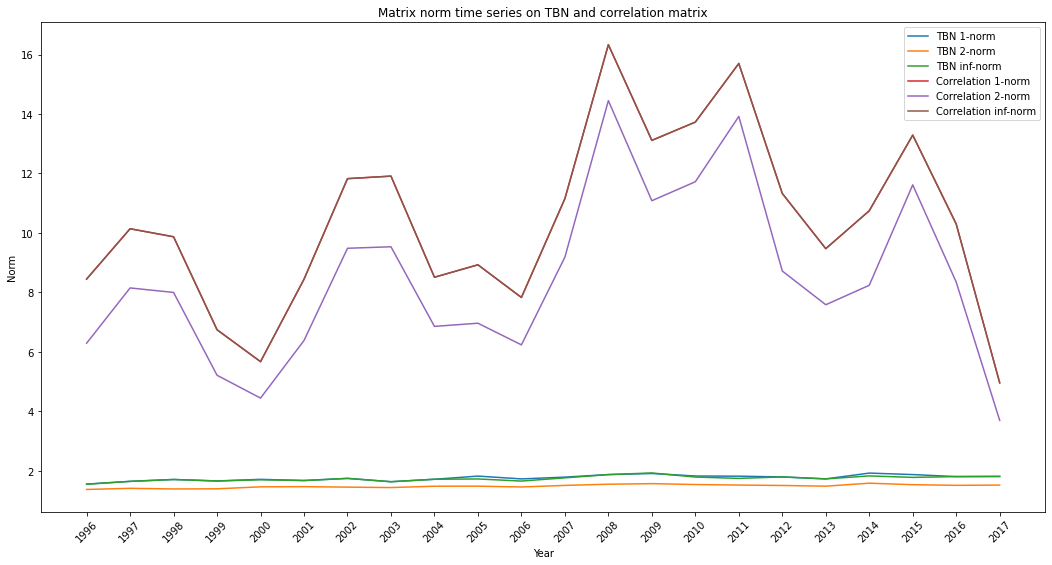

In [6]:
df = get_norm_time_series()
file_name = 'Matrix norm time series on TBN and correlation matrix'
plot = df.plot(title = file_name,
                                                            xlabel = 'Year',
                                                            ylabel = 'Norm',
                                                            figsize = (18, 9),
                                                            xticks = range(1996, 2018),
                                                            rot = 45)

plot.figure.savefig('../../picture/' + file_name + '.png')

In [13]:
norm_stats = df.describe()
norm_stats.iloc[[1,2,3,7]]

,TBN 1-norm,TBN 2-norm,TBN inf-norm,Correlation 1-norm,Correlation 2-norm,Correlation inf-norm
mean,1.765536,1.487742,1.743323,10.384932,8.462111,10.384932
std,0.095852,0.058004,0.086155,2.946540,2.804063,2.946540
min,1.555500,1.377361,1.555500,4.961442,3.699953,4.961442
max,1.927700,1.588529,1.932300,16.330260,14.450576,16.330260


In [12]:
file_path = '../../output/table/'
file_name = 'matrix_norm_stats.tex'
norm_stats.iloc[[1,2,3,7]].to_latex(file_path + file_name)

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  TBN 1-norm &  TBN 2-norm &  TBN inf-norm &  Correlation 1-norm &  Correlation 2-norm &  Correlation inf-norm \\\\\n\\midrule\nmean &    1.765536 &    1.487742 &      1.743323 &           10.384932 &            8.462111 &             10.384932 \\\\\nstd  &    0.095852 &    0.058004 &      0.086155 &            2.946540 &            2.804063 &              2.946540 \\\\\nmin  &    1.555500 &    1.377361 &      1.555500 &            4.961442 &            3.699953 &              4.961442 \\\\\nmax  &    1.927700 &    1.588529 &      1.932300 &           16.330260 &           14.450576 &             16.330260 \\\\\n\\bottomrule\n\\end{tabular}\n'